**AQI Prediction Using Decision tree regressior**

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [3]:
with open('/content/drive/MyDrive/Google_colab_project/df.pkl','rb') as file:
    df= pickle.load(file)

In [4]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

### **Decision Tree Regressor Implementation without Hyper Tuning**

In [6]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor(criterion="mse",random_state=100)
dtree.fit(X_train,y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=100, splitter='best')

In [7]:

print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on test set: {}".format(dtree.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 1.0
Coefficient of determination R^2 <-- on test set: 0.7275840269999545


#### **Model Evaluation**



In [8]:
#Prediction for test dataset
tree_prediction=dtree.predict(X_test)

In [10]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, tree_prediction))
print('MSE:', metrics.mean_squared_error(y_test, tree_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tree_prediction)))

MAE: 23.877473363774737
MSE: 2045.970771974886
RMSE: 45.232408425540264


### **Checking Actual value vs Predicted Value**

In [11]:
# Check for Linearity
def actual_predict(actual,predicted):
  fig=plt.figure(figsize=(14,5))
  ax = fig.add_subplot(121)
  sns.scatterplot(actual,predicted,ax=ax,color='r',marker="+",alpha=1)
  ax.set_title('Check for Linearity:\n Actual Vs Predicted value')
  #sns.scatterplot(y_test, y_prediction, marker="+",color='g',alpha=1)
  # Check for Residual normality & mean
  ax = fig.add_subplot(122)
  sns.distplot((actual - predicted),ax=ax,color='b')
  ax.axvline((actual - predicted).mean(),color='k',linestyle='--')
  ax.set_title('Check for Residual normality & mean: \n Residual eror');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


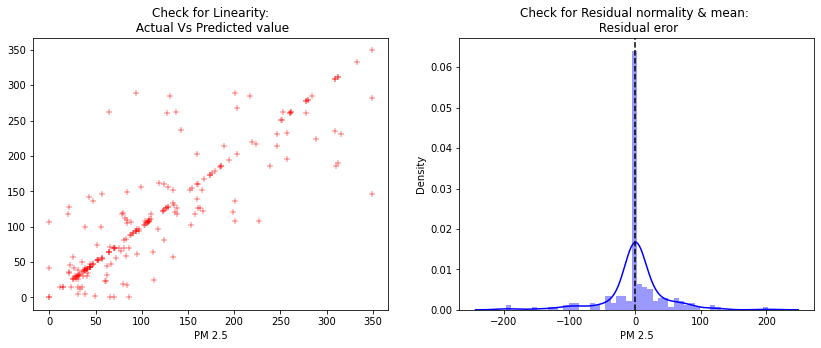

In [12]:
actual_predict(y_test,tree_prediction)

In [13]:

# Quantile-Quantile plot 
def predicted_residual(actual,predicted):
  fig,ax = plt.subplots(1,2,figsize=(14,6))
  import scipy as sp
  _,(_,_,r)= sp.stats.probplot((actual-predicted),fit=True,plot=ax[0])
  ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

  #Check for Homoscedasticity
  sns.scatterplot(y = (actual-predicted), x= predicted, ax = ax[1],marker="+",color='r') 
  plt.ylabel('Residual')
  plt.xlabel('Predicted')
  ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

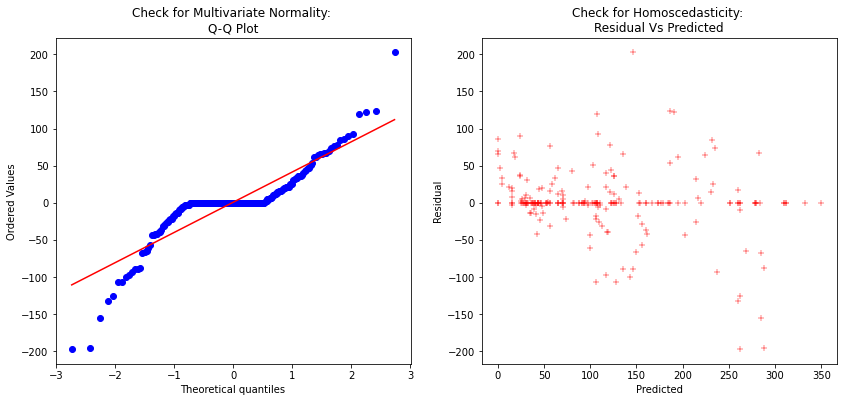

In [14]:
predicted_residual(y_test,tree_prediction)

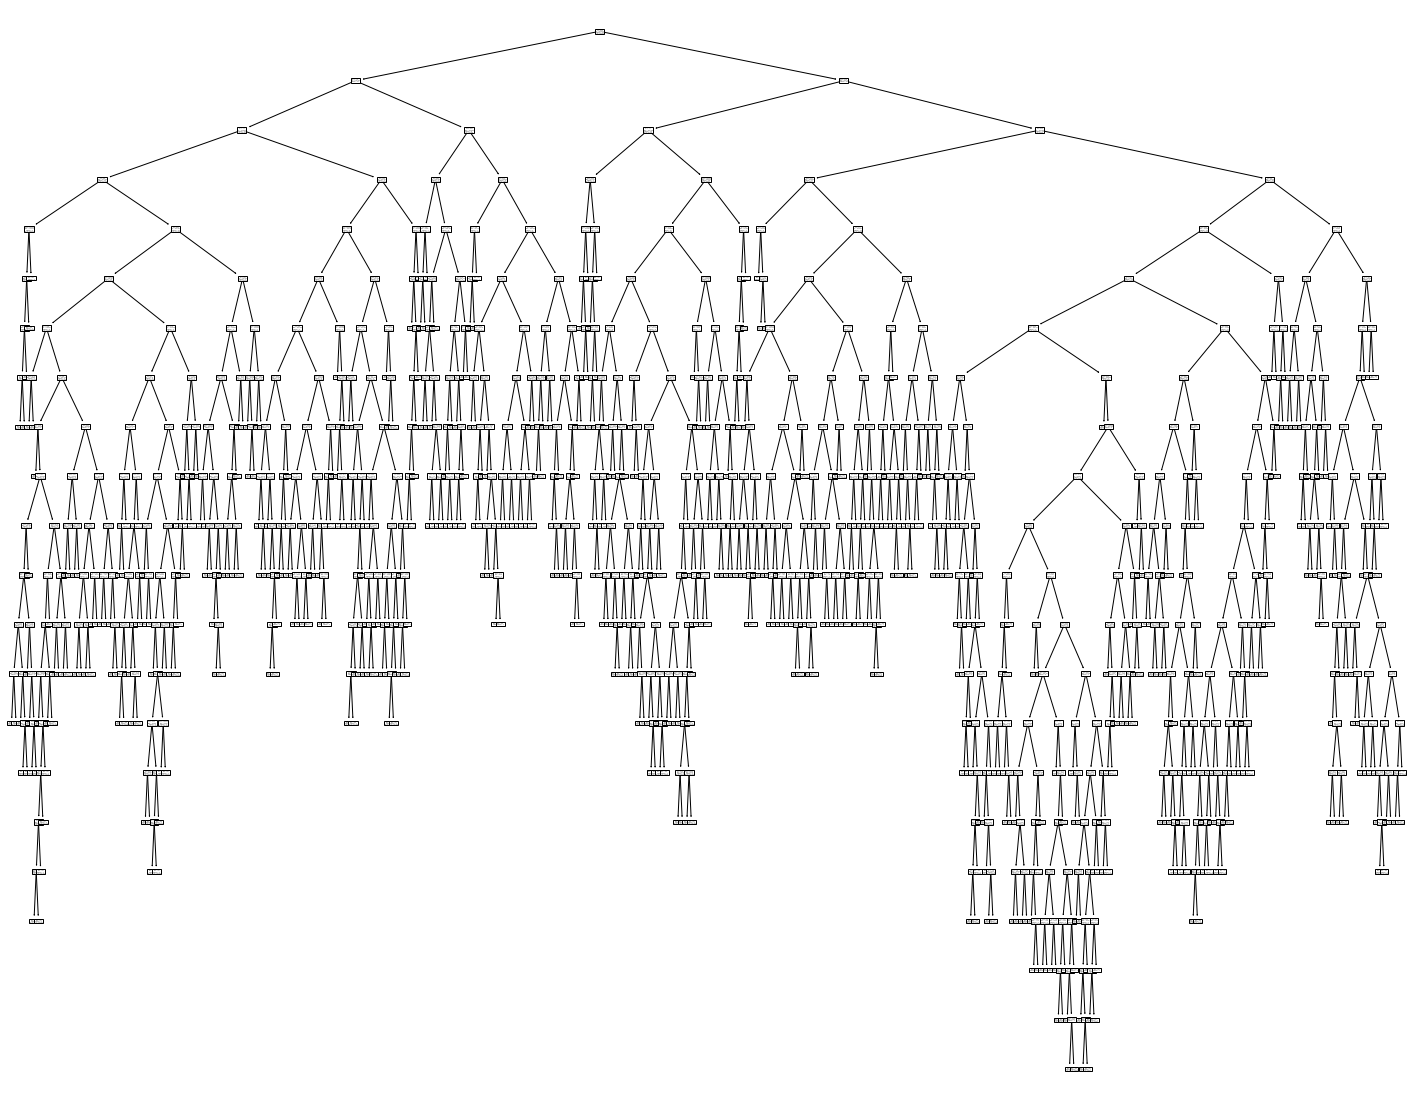

In [16]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, 
                   feature_names=X.columns,  
                   class_names='PM 2.5',
                   filled=False)

Decision tree  Regressor model has  RMSE(Root Mean Square Error) is around 45 without any hyperparameter tuning. So, Next, we will do hyperparameter tuning to getting a lower RMSE value.

### **Decision-Tree Regressor Implementation with Hyperparameter Tuning- Randomized SerchCV**


#### Randomized SerchCV-1

In [20]:
dtree_cv1=DecisionTreeRegressor(random_state=100)

In [30]:
#Randomized Search CV

from sklearn.model_selection import RandomizedSearchCV
#Criterion type
criterion=["mse","friedman_mse","mae"]
#Spli type 
splitter=["best","random"]
# Features
max_features=["auto","sqrt","log2"]
max_depth = [int(x) for x in np.linspace(5, 100, num = 10)]
#Subssample parameter values
min_samples_split=[int(x) for x in np.linspace(2, 50, num = 6)]


In [31]:

# Create the random grid
random_grid_1 = {'criterion': criterion,
               'splitter': splitter,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

print(random_grid_1)

{'criterion': ['mse', 'friedman_mse', 'mae'], 'splitter': ['best', 'random'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 15, 26, 36, 47, 57, 68, 78, 89, 100], 'min_samples_split': [2, 11, 21, 30, 40, 50]}


In [32]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations

tree_rcv1 = RandomizedSearchCV(estimator = dtree_cv1, param_distributions = random_grid_1,
                               scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, 
                               random_state=100, n_jobs = 1)


In [33]:
tree_rcv1.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] splitter=random, min_samples_split=21, max_features=log2, max_depth=36, criterion=mse 
[CV]  splitter=random, min_samples_split=21, max_features=log2, max_depth=36, criterion=mse, total=   0.0s
[CV] splitter=random, min_samples_split=21, max_features=log2, max_depth=36, criterion=mse 
[CV]  splitter=random, min_samples_split=21, max_features=log2, max_depth=36, criterion=mse, total=   0.0s
[CV] splitter=random, min_samples_split=21, max_features=log2, max_depth=36, criterion=mse 
[CV]  splitter=random, min_samples_split=21, max_features=log2, max_depth=36, criterion=mse, total=   0.0s
[CV] splitter=random, min_samples_split=21, max_features=log2, max_depth=36, criterion=mse 
[CV]  splitter=random, min_samples_split=21, max_features=log2, max_depth=36, criterion=mse, total=   0.0s
[CV] splitter=random, min_samples_split=21, max_features=log2, max_depth=36, criterion=mse 
[CV]  splitter=random, min_samples_split=21, max_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  splitter=random, min_samples_split=21, max_features=log2, max_depth=68, criterion=mae, total=   0.0s
[CV] splitter=random, min_samples_split=21, max_features=log2, max_depth=68, criterion=mae 
[CV]  splitter=random, min_samples_split=21, max_features=log2, max_depth=68, criterion=mae, total=   0.0s
[CV] splitter=best, min_samples_split=40, max_features=log2, max_depth=89, criterion=mse 
[CV]  splitter=best, min_samples_split=40, max_features=log2, max_depth=89, criterion=mse, total=   0.0s
[CV] splitter=best, min_samples_split=40, max_features=log2, max_depth=89, criterion=mse 
[CV]  splitter=best, min_samples_split=40, max_features=log2, max_depth=89, criterion=mse, total=   0.0s
[CV] splitter=best, min_samples_split=40, max_features=log2, max_depth=89, criterion=mse 
[CV]  splitter=best, min_samples_split=40, max_features=log2, max_depth=89, criterion=mse, total=   0.0s
[CV] splitter=best, min_samples_split=40, max_features=log2, max_depth=89, criterion=mse 
[CV]  splitter=best

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.9s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=100,
                                                   splitter='best'),
                   iid='de

In [34]:
print(tree_rcv1.best_params_)
print(tree_rcv1.best_score_)

{'splitter': 'best', 'min_samples_split': 2, 'max_features': 'auto', 'max_depth': 89, 'criterion': 'friedman_mse'}
-2052.6906862780515


### **Model Evaluation-1**

In [35]:
tree_rcv1_prediction=tree_rcv1.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test,tree_rcv1_prediction))
print('MSE:', metrics.mean_squared_error(y_test, tree_rcv1_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tree_rcv1_prediction)))

MAE: 25.561054033485544
MSE: 2316.478613410072
RMSE: 48.12981002881761


#### Randomized SerchCV-2

In [36]:
dtree_cv2=DecisionTreeRegressor(random_state=100)

In [40]:
#Randomized Search CV

from sklearn.model_selection import RandomizedSearchCV
#Criterion type
criterion=["mse","friedman_mse","mae"]
#Spli type 
splitter=["best","random"]
# Features
max_features=["auto","sqrt","log2"]
max_depth = [int(x) for x in np.linspace(50, 150, num = 10)]
#Subssample parameter values
min_samples_split=[int(x) for x in np.linspace(2, 20, num = 10)]

In [41]:


# Create the random grid
random_grid_2= {'criterion': criterion,
               'splitter': splitter,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

print(random_grid_2)

{'criterion': ['mse', 'friedman_mse', 'mae'], 'splitter': ['best', 'random'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [50, 61, 72, 83, 94, 105, 116, 127, 138, 150], 'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]}


In [42]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations

tree_rcv2 = RandomizedSearchCV(estimator = dtree_cv2, param_distributions = random_grid_2,
                               scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, 
                               random_state=100, n_jobs = 1)

tree_rcv2.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] splitter=best, min_samples_split=14, max_features=sqrt, max_depth=127, criterion=friedman_mse 
[CV]  splitter=best, min_samples_split=14, max_features=sqrt, max_depth=127, criterion=friedman_mse, total=   0.0s
[CV] splitter=best, min_samples_split=14, max_features=sqrt, max_depth=127, criterion=friedman_mse 
[CV]  splitter=best, min_samples_split=14, max_features=sqrt, max_depth=127, criterion=friedman_mse, total=   0.0s
[CV] splitter=best, min_samples_split=14, max_features=sqrt, max_depth=127, criterion=friedman_mse 
[CV]  splitter=best, min_samples_split=14, max_features=sqrt, max_depth=127, criterion=friedman_mse, total=   0.0s
[CV] splitter=best, min_samples_split=14, max_features=sqrt, max_depth=127, criterion=friedman_mse 
[CV]  splitter=best, min_samples_split=14, max_features=sqrt, max_depth=127, criterion=friedman_mse, total=   0.0s
[CV] splitter=best, min_samples_split=14, max_features=sqrt, max_depth=127, c

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  splitter=best, min_samples_split=18, max_features=auto, max_depth=50, criterion=mae, total=   0.0s
[CV] splitter=random, min_samples_split=2, max_features=auto, max_depth=94, criterion=mse 
[CV]  splitter=random, min_samples_split=2, max_features=auto, max_depth=94, criterion=mse, total=   0.0s
[CV] splitter=random, min_samples_split=2, max_features=auto, max_depth=94, criterion=mse 
[CV]  splitter=random, min_samples_split=2, max_features=auto, max_depth=94, criterion=mse, total=   0.0s
[CV] splitter=random, min_samples_split=2, max_features=auto, max_depth=94, criterion=mse 
[CV]  splitter=random, min_samples_split=2, max_features=auto, max_depth=94, criterion=mse, total=   0.0s
[CV] splitter=random, min_samples_split=2, max_features=auto, max_depth=94, criterion=mse 
[CV]  splitter=random, min_samples_split=2, max_features=auto, max_depth=94, criterion=mse, total=   0.0s
[CV] splitter=random, min_samples_split=2, max_features=auto, max_depth=94, criterion=mse 
[CV]  splitter=r

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    4.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=100,
                                                   splitter='best'),
                   iid='de

### Model Evaluation -2 

In [43]:
tree_rcv2_prediction=tree_rcv2.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test,tree_rcv2_prediction))
print('MSE:', metrics.mean_squared_error(y_test, tree_rcv2_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tree_rcv2_prediction)))

MAE: 26.917567224759008
MSE: 2440.952402192909
RMSE: 49.405995609773


In [44]:
import pickle
# open a file, where you ant to store the data
file = open('dtree_randomcv1.pkl', 'wb')

# dump information to that file
pickle.dump(tree_rcv2, file)

### Conclusion 
For this decision tree regressor, we haven’t got lower RMSE values Even though, after hyperparameter tuning also, we got the same RMSE value that we got without hyperparameter tuning So, the Decision tree regressor not suitable for these problems.
